# Temporal Networks v2.0 #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import itertools as it

In [2]:
import RandTempNet.utils as tnu
import RandTempNet.measures as tnm
import RandTempNet.randomisations as tnr

## Intersections ##
We here present randomisations that combine several aspects.

### Global event shuffling $\text{P}[\mathbf{w},\mathbf{t}]$: `P__w_t(lks_data,dt)` ###
This function shuffles events between existing links of a `link_timeline()` object `lks_data` while preserving the link weights. The time step duration `dt` is required.

**Note:** This function returns a `tij()` object.

In [3]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_tij = tnr.P__w_t(lks_data,1)
new_lks = tnu.tijtau_to_link_timeline(tnu.tij_to_tijtau(new_tij,1))

Test of the preservation of the weights:

In [4]:
w0 = tnm.weights(lks_data)
w1 = tnm.weights(new_lks)
Test = np.array([w0[lk] == w1[lk] for lk in lks_data.links()])
Test.all()

True

Test of the preservation of the activity timeline:

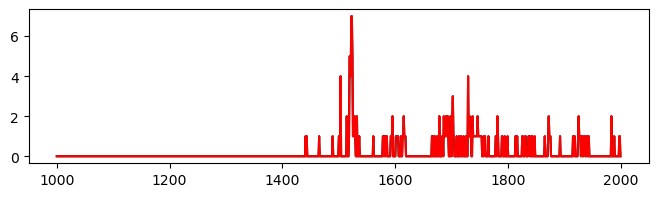

In [5]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

Test of the modification of $p_\tau$:

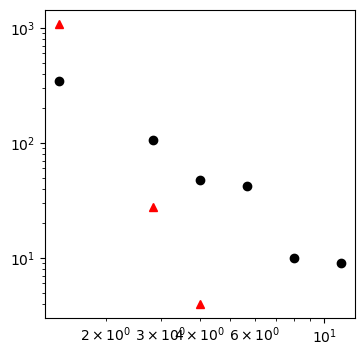

In [6]:
list_tau0 = tnm.contact_durations(lks_data)
list_tau1 = tnm.contact_durations(new_lks)
list_tau0 = list(it.chain(*list_tau0.values()))
list_tau1 = list(it.chain(*list_tau1.values()))

from math import log

fig = plt.figure(figsize=(4,4))
tmax = max(list_tau0)
x = 2.**(np.arange(0,log(tmax)+1,0.5))
h0 = np.histogram(list_tau0,bins=x)
h1 = np.histogram(list_tau1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()

### Global contact shuffling $\text{P}[\mathcal{L},p(\mathbf{t},\tau)]$: `P__L_pttau(lks_data,dt)` ###
This function shuffles contacts between existing links of a `link_timeline()` object `lks_data`. The time step duration `dt` is required.

In [7]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_lks = tnr.P__L_pttau(lks_data,1)

Test of the preservation of the $p_\tau$:

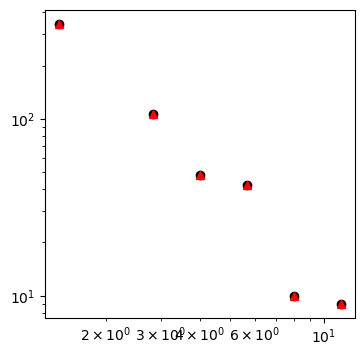

In [8]:
list_tau0 = tnm.contact_durations(lks_data)
list_tau1 = tnm.contact_durations(new_lks)
list_tau0 = list(it.chain(*list_tau0.values()))
list_tau1 = list(it.chain(*list_tau1.values()))

fig = plt.figure(figsize=(4,4))
tmax = max(list_tau0)
x = 2.**(np.arange(0,log(tmax)+1,0.5))
h0 = np.histogram(list_tau0,bins=x)
h1 = np.histogram(list_tau1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()

Test of the preservation of the activity timeline:

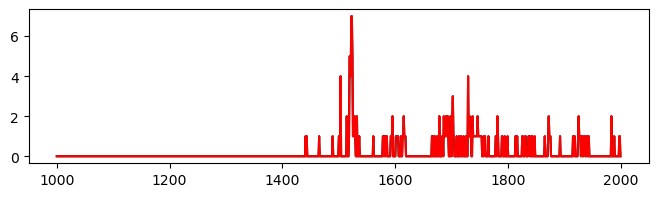

In [9]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

Test of the modification of the weights distribution:

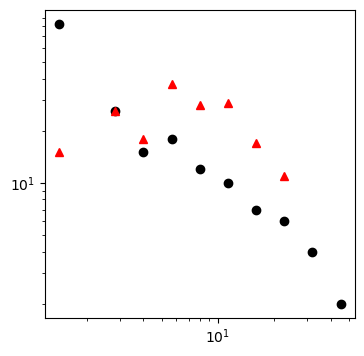

In [11]:
list_w0 = list(tnm.weights(lks_data).values())
list_w1 = list(tnm.weights(new_lks).values())

fig = plt.figure(figsize=(4,4))
wmax = max(list_w0)
x = 2.**(np.arange(0,log(wmax)+1,0.5))
h0 = np.histogram(list_w0,bins=x)
h1 = np.histogram(list_w1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()

### Global contact shuffling with frequency preservation $\text{P}[\mathbf{n},p(\mathbf{t},\tau)]$: `P__n_pttau(lks_data,dt)` ###
This function shuffles contacts between existing links of a `link_timeline()` object `lks_data` but preserves the frequencies. The time step duration `dt` is required.

In [12]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_lks = tnr.P__n_pttau(lks_data,1)

Test of the preservation of the frequencies:

In [13]:
n0 = tnm.number_of_contacts(lks_data)
n1 = tnm.number_of_contacts(new_lks)
Test = np.array([n0[lk] == n1[lk] for lk in lks_data.links()])
Test.all()

True

Test of the preservation of the activity timeline:

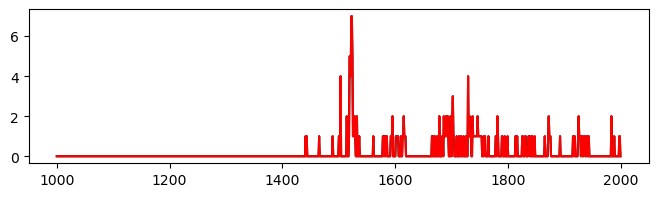

In [14]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Timeline permutation $\text{P}[\mathcal{L},p_\mathcal{L}(\Theta)]$: `P__L_pTheta(lks_data)` ###
This function randomly permutates the timelines of a `link_timeline()` object `lks_data`.

In [15]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_lks = tnr.P__L_pTheta(lks_data)

In [17]:
lk = lks_data.links()[0]
old_tl = [c.display() for c in lks_data.data[lk]]
new_tl = [c.display() for c in new_lks.data[lk]]
print(old_tl[:10])
print(new_tl[:10])

[(2869, 1)]
[(2490, 1), (2487, 1), (2393, 1), (2465, 1), (2229, 1), (2499, 1)]


### Timeline permutation with weight preservation $\text{P}[\mathbf{w},p_\mathcal{L}(\Theta)]$: `P__w_pTheta(lks_data)` ###
This function randomly permutates the timelines of a `link_timeline()` object `lks_data`, but preserves their weights.

In [18]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_lks = tnr.P__w_pTheta(lks_data)

Test of the preservation of contact frequencies:

In [19]:
w0 = tnm.weights(lks_data)
w1 = tnm.weights(new_lks)
Test = np.array([w0[l] == w1[l] for l in w0])
Test.all()

True

In [21]:
lk = lks_data.links()[0]
old_tl = [c.display() for c in lks_data.data[lk]]
new_tl = [c.display() for c in new_lks.data[lk]]
print(old_tl[:10])
print(new_tl[:10])

[(2869, 1)]
[(2379, 1)]


### Timeline permutation with contact frequency preservation $\text{P}[\mathbf{n},p_\mathcal{L}(\Theta)]$: `P__n_pTheta(lks_data)` ###
This function randomly permutates the timelines of a `link_timeline()` object `lks_data`, but preserves their contact frequencies.

In [22]:
lks_data = tnu.read_link_timeline("./data/lks.dat")
new_lks = tnr.P__n_pTheta(lks_data)

Test of the preservation of contact frequencies:

In [23]:
cont0 = tnm.number_of_contacts(lks_data)
cont1 = tnm.number_of_contacts(new_lks)
Test = np.array([cont0[l] == cont1[l] for l in cont0])
Test.all()

True

In [25]:
lk = lks_data.links()[0]
old_tl = [c.display() for c in lks_data.data[lk]]
new_tl = [c.display() for c in new_lks.data[lk]]
print(old_tl[:10])
print(new_tl[:10])

[(2869, 1)]
[(3154, 1)]
